# Data Bootcamp:  Code Practice A (answerkey) 

Optional Code Practice A:  Jupyter basics and Python's **[graphics tools](https://davebackus.gitbooks.io/test/content/graphs1.html)** (the Matplotlib package). The goals are to become familiar with Jupyter and Matplotlib and to explore some datasets.  

**The data management part of this goes beyond what we've done in class to date.**  We recommend you just run the code provided and focus on the graphs for now.  

This notebook written by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

**Check Jupyter before we start.** Run the code below and make sure it works.  

In [2]:
# to make sure things are working, run this 
import pandas as pd
print('Pandas version: ', pd.__version__) 

Pandas version:  0.17.1


If you get something like "Pandas version:  0.17.1" you're fine.  If you get an error, bring your computer by and ask for help.  If you're unusually brave, go to [StackOverflow](http://stackoverflow.com/a/19961403/804513) and read the instructions.  Then come ask for help.  (This has to do with how your computer processes unicode.  When you hear that word -- unicode -- you should run away at high speed.)     

## Question 1. Setup 

Import packages, arrange for graphs to display in the notebook. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
%matplotlib inline

**Remind yourself:**

* What does the `pandas` package do?  [data management]
* What does the `matplotlib` package do?  [graphics]
* What does `%matplotlib inline` do?  [displays plots in the notebook] 

## Question 2.  Jupyter basics 

* We refer to the cell that's highlighted as the **current cell**.  
* Clicking once on any cell makes it the current cell.  Clicking again allows you to edit it.   
* The + in the toolbar at the top creates a new cell below the current cell.  
* Change a cell from Code to Markdown (in other words, text) with the dropdown menu in the toolbar.  
* To run a cell, hit shift-enter or click on the run-cell icon in the tooolbar (sideways triangle and vertical line). 
* For more information, click on Help at the top.  User Interface Tour is a good place to start.

Practice with the following:  

* Make this cell the current cell. 
* Add an empty cell below it.  
* Add text to the new cell:  your name and the date, for example.  
* *Optional:*  Add a link to your LinkedIn or Facebook page.  *Hint:* Look at the text in the top cell to find an example of a link.  
* Run the cell.  

## Question 3. Winner take all and the long tail in the US beer industry

The internet has produced some interesting market behavior, music being a great example.  Among them:  

* Winner take all.  The large producers (Beyonce, for example) take larger shares of the market than they had in the past.  
* The long tail.  At the same time, small producers in aggregate increase their share.  

Curiously enough, we see the same thing in the US beer industry:   

* Scale economies and a reduction in transportation costs (the interstate highway system was built in the 1950s and 60s) led to consolidation, with the large firms getting larger, and the small ones either sellingout or going bankrupt.  (How many beer brands can you think of that no longer exist?)  
* Starting in the 1980s, we saw a significant increase in the market share of small firms ("craft brewers") overall, even though each of them remains small.  

We illustrate this with data from Victor and Carol Tremblay that describe the output of the top 100 US beer producers from 1947 to 2004.  This is background data from their book, [The US Brewing Industry](http://www.amazon.com/The-US-Brewing-Industry-Economic/dp/0262512637), MIT Press, 2004.  See [here](http://people.oregonstate.edu/~tremblac/pdf/Appendix%20A%20Weinberg%20Data.pdf) for the names of the brewers.  Output is measured in thousands of 31-gallon barrels.  

**Data manipulation.** The data manipulation goes beyond what we've done in class.  You're free to ignore it, but here's the idea.  

* The spreadsheet contains output by firms ranked 1 to 100 in size.  Each row refers to a specific year and includes the outputs of firms in order of size.  We don't have their names.  
* We transpose this so that the columns are years and include output for the top-100 firms.  The row labels are the size rank of the firm.  
* We then plot the size against the rank for four years to see how it has changed.  

In [4]:
url = 'http://pages.stern.nyu.edu/~dbackus/Data/beer_production_1947-2004.xlsx'
beer = pd.read_excel(url, skiprows=12, index_col=0)

print('Dimensions:', beer.shape)
beer[list(range(1,11))].head(3)

Dimensions: (58, 115)


,1,2,3,4,5,6,7,8,9,10
YEAR,,,,,,,,,,
1947,3991,3732,3726,3609,2240,2100,1902,1652,1491,1167
1948,4865,4280,4138,4042,2443,2250,2110,1638,1376,1202
1949,4843,4673,4526,4514,2474,1927,1875,1598,1438,1436


In [5]:
vars = list(range(1,101))   # extract top 100 firms 
pdf = beer[vars].T          # transpose (flip rows and columns)
pdf[[1947, 1967, 1987, 2004]].head()

YEAR,1947,1967,1987,2004
1,3991,15535,76084,103000
2,3732,10382,39260,38560
3,3726,10124,21275,22250
4,3609,6631,16000,7450
5,2240,4917,15658,1380


**Question.** Can you see consolidation here?

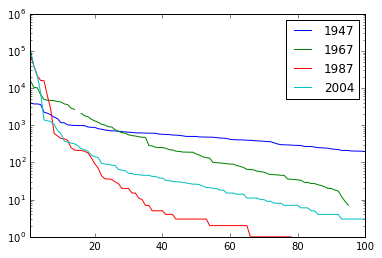

In [6]:
# a basic plot 
fig, ax = plt.subplots()

pdf[1947].plot(ax=ax, logy=True)
pdf[1967].plot(ax=ax, logy=True)
pdf[1987].plot(ax=ax, logy=True)
pdf[2004].plot(ax=ax, logy=True)
ax.legend()

**Answer these questions below.** Code is sufficient, but it's often helpful to add comments to remind yourself what you did, and why.  

* Get help for the `set.title` method by typing `ax.set_title?` in a new cell and running it.  Note that you can open the documentation this produces in a separate tab with the icon in the upper right (hover text = "Open the pager in an external window").  
* Add a title with `ax.set_title('Your title')`.  
* Change the fontsize of the title to 14.  
* What happens if we add the argument/parameter `lw=2` to the `ax.plot()` statements?  
* Add a label to the x axis with `ax.set_xlabel()`.  
* Add a label to the y axis.  
* Why did we use a log scale (`logy=True`)?  What happens if we don't?
* Use the `color` argument/parameter to choose a more effective set of colors.  
* In what sense do you see "winner takes all"?  A "long tail"?   

Put each answer in a separate code cell.  

In [7]:
# for help
ax.set_title?

In [8]:
# this is easier if we put the basic plot in a function 
def make_plot():
    fig, ax = plt.subplots()
    pdf[1947].plot(ax=ax, logy=True)
    pdf[1967].plot(ax=ax, logy=True)
    pdf[1987].plot(ax=ax, logy=True)
    pdf[2004].plot(ax=ax, logy=True)
    ax.legend()
    return ax 

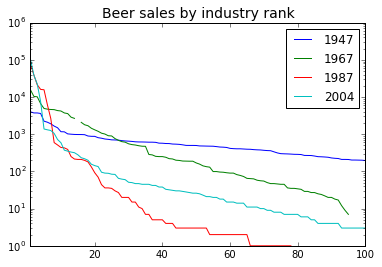

In [9]:
ax = make_plot() 
ax.set_title('Beer sales by industry rank', fontsize=14)

In [10]:
# line width:  put lw=2 in each of the plot statements 

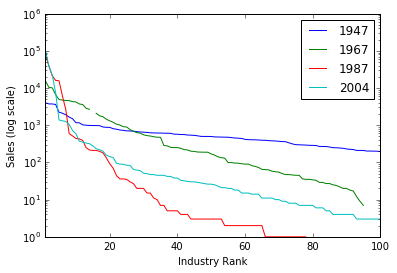

In [11]:
ax = make_plot() 
ax.set_xlabel('Industry Rank')
ax.set_ylabel('Sales (log scale)')

In [12]:
# log scale:  otherwise the differences are too large
# we can't show the alternative because some of the numbers are zero 

In [13]:
# color:  we add color='somecolor' in each of the plot statements

## Question 4.  Japan's aging population 

Populations are getting older throughout the world, but Japan is a striking example.  One of our favorite quotes:

> Last year, for the first time, sales of adult diapers in Japan exceeded those for babies. 

Let's see what the numbers look like using projections fron the [United Nations' Population Division](http://esa.un.org/unpd/wpp/Download/Standard/Population/).  They have several projections; we use what they call the "medium variant." 

We have a similar issue with the data:  population by age for a given country and date goes across rows, not down columns.  So we choose the ones we want and transpose them.  Again, more than we've done so far.  

In [14]:
# data input (takes about 20 seconds on a wireless network)
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])
print('Dimensions: ', prj.shape)
print('Column labels: ', prj.columns)

Dimensions:  (4338, 24)
Column labels:  Index(['Major area, region, country or area *', 'Country code',
       'Reference date (as of 1 July)', '0-4', '5-9', '10-14', '15-19',
       '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99',
       '100+'],
      dtype='object')


In [15]:
# rename some variables 
pop = prj
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select countries and years  
countries = ['Japan']
years     = [2015, 2035, 2055, 2075, 2095]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop = pop.set_index('Year').T
pop = pop/1000    # convert population from thousands to millions 
pop.head()

Year,2015,2035,2055,2075,2095
0-4,5.269038,4.610562,4.271907,3.979032,3.720541
5-9,5.398973,4.720645,4.371016,4.038305,3.789596
10-14,5.603638,4.880967,4.458145,4.106899,3.860493
15-19,5.960784,5.114258,4.557117,4.205584,3.938189
20-24,6.111768,5.340457,4.685414,4.333554,4.025477


In [16]:
pop.tail()

Year,2015,2035,2055,2075,2095
80-84,4.940325,6.327227,7.456047,5.122114,4.761542
85-89,3.115732,5.517980,5.368363,4.815303,4.300830
90-94,1.338774,2.871710,3.233182,3.714384,3.407697
95-99,0.366082,1.029126,1.437057,2.146187,2.082468
100+,0.060630,0.216863,0.462541,0.779118,0.844420


**Comment.** Now we have the number of people in any five-year age group running down columns.  The column labels are the years.  

With the dataframe `df`:  

* Plot the current age distribution with `pop[[2015]].plot()`.  Note that `2015` here does not have quotes around it:  it's an unusual case of integer column labels. 
* Plot the current age distribution as a bar chart.  Which do you think looks better?  
* Create figure and axis objects 
* Use the axis object to plot the age distribution for all the years in the dataframe.  
* Add titles and axis labels. 
* Plot the age distribution for each date in a separate subplot.  What argument parameter does this?  *Bonus points:* Change the size of the figure to accomodate the subplots.  

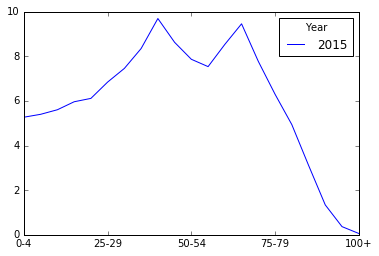

In [17]:
pop[[2015]].plot()

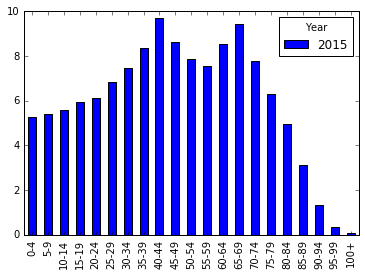

In [18]:
pop[[2015]].plot(kind='bar')

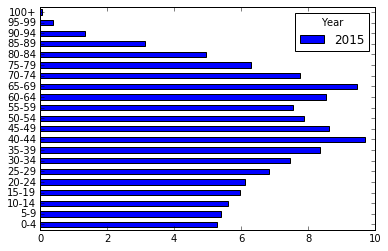

In [19]:
# my fav
pop[[2015]].plot(kind='barh')

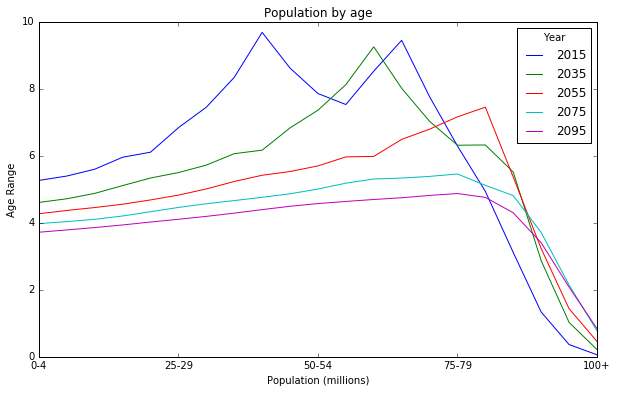

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
pop.plot(ax=ax)
ax.set_title('Population by age')
ax.set_xlabel('Population (millions)')
ax.set_ylabel('Age Range')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF5C2E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A9410F0>], dtype=object)

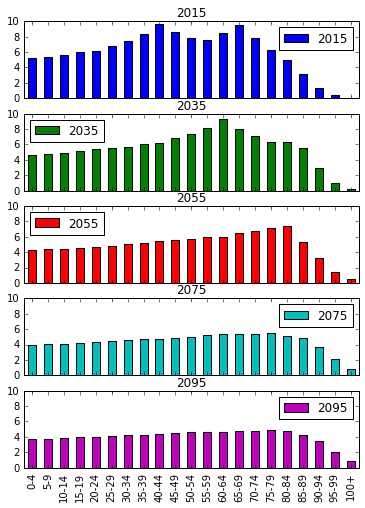

In [22]:
pop.plot(kind='bar', subplots=True, figsize=(6,8), sharey=True)

## Question 5.  Dynamics of the yield curve 

One of our favorite topics is the yield curve:  a plot of the yield to maturity on a bond against the bond's maturity.  The foundation here is yields on zero coupon bonds, which are simpler objects than yields on coupon bonds.  

We often refer to bond yields rising or falling, but in fact the yield curve often does different things at different maturities.  We will see that here.  For several years, short yields have been stuck at zero, yet yields for bond with maturities of two years and above have varied quite a bit.  

We use the Fed's well-known [Gurkaynak, Sack, and Wright data](http://www.federalreserve.gov/pubs/feds/2006/200628/200628abs.html), which provides daily data on US Treasury yields from 1961 to the present.  The Fed posts the data, but it's in an unfriendly format.  So we saved it as a csv file, which we read in below.  The variables are yields:  `SVENYnn` is the yield for maturity `nn` years.  

In [23]:
# data input (takes about 20 seconds on a wireless network)
url = 'http://pages.stern.nyu.edu/~dbackus/Data/feds200628.csv'
gsw = pd.read_csv(url, skiprows=9, index_col=0, usecols=list(range(11)), parse_dates=True) 
print('Dimensions: ', gsw.shape)
print('Column labels: ', gsw.columns)
print('Row labels: ', gsw.index)

Dimensions:  (13638, 10)
Column labels:  Index(['SVENY01', 'SVENY02', 'SVENY03', 'SVENY04', 'SVENY05', 'SVENY06',
       'SVENY07', 'SVENY08', 'SVENY09', 'SVENY10'],
      dtype='object')
Row labels:  DatetimeIndex(['2016-02-24', '2016-02-23', '2016-02-22', '2016-02-19',
               '2016-02-18', '2016-02-17', '2016-02-16', '2016-02-12',
               '2016-02-11', '2016-02-10',
               ...
               '1961-06-27', '1961-06-26', '1961-06-23', '1961-06-22',
               '1961-06-21', '1961-06-20', '1961-06-19', '1961-06-16',
               '1961-06-15', '1961-06-14'],
              dtype='datetime64[ns]', length=13638, freq=None)


In [24]:
# grab recent data 
df = gsw[gsw.index >= dt.datetime(2010,1,1)]
# convert to annual, last day of year
df = df.resample('A', how='last').sort_index()
df.head()

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10
2010-12-31,0.3033,0.5956,1.0605,1.5529,2.0129,2.4201,2.7719,3.0724,3.3279,3.5448
2011-12-31,0.1493,0.2425,0.4165,0.6365,0.8778,1.1237,1.3630,1.5886,1.7963,1.9843
2012-12-31,0.1943,0.2485,0.3756,0.5505,0.7539,0.9715,1.1928,1.4102,1.6183,1.8137
2013-12-31,0.1511,0.3953,0.8306,1.3095,1.7627,2.1628,2.5029,2.7859,3.0189,3.2097
2014-12-31,0.2940,0.7064,1.1185,1.4471,1.6912,1.8696,2.0014,2.1012,2.1795,2.2432


In [25]:
df.columns = list(range(1,11))
ylds = df.T
ylds.head(3)

,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00
1,0.3033,0.1493,0.1943,0.1511,0.2940,0.7898,0.6132
2,0.5956,0.2425,0.2485,0.3953,0.7064,1.0755,0.7607
3,1.0605,0.4165,0.3756,0.8306,1.1185,1.3501,0.9299


With the dataframe `ylds`:  

* Create figure and axis objects 
* Use the axis object to plot the yield curve for all the years in the dataframe.  
* Add a title and axis labels. 
* Explain what you see:  What happened to the yield curve over the past six years? 
* **Challenging.**  Compute the mean yield for each maturity.  Plot them on the same graph in black.  

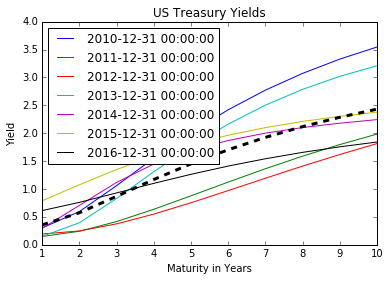

In [35]:
fig, ax = plt.subplots()
ylds.plot(ax=ax)
ax.set_title('US Treasury Yields')
ax.set_ylabel('Yield')
ax.set_xlabel('Maturity in Years')

ybar = ylds.mean(axis=1)
ybar.plot(ax=ax, color='black', linewidth=3, linestyle='dashed')